In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from ML_Cource_Final_Project.building_blocks import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mam1680/ML_Cource_Final_Project.git
    from ML_Cource_Final_Project.building_blocks import data_setup, engine

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'ML_Cource_Final_Project'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 1), reused 17 (delta 1), pack-reused 0
Receiving objects: 100% (20/20), 1.93 MiB | 4.74 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mam1680","key":"2dac4e1f3ab411f8c1fe5d8df1a51e66"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yaswanthgali/sport-celebrity-image-classification
!mkdir sport-celebrity-image-classification
!unzip sport-celebrity-image-classification.zip -d sport-celebrity-image-classification

Dataset URL: https://www.kaggle.com/datasets/yaswanthgali/sport-celebrity-image-classification
License(s): CC0-1.0
 81% 12.0M/14.8M [00:00<00:00, 21.3MB/s]
100% 14.8M/14.8M [00:00<00:00, 16.1MB/s]
Archive:  sport-celebrity-image-classification.zip
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(1).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(10).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(100).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(101).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(102).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(103).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(104).jpg  
  infl

In [6]:
import os
os.remove("sport-celebrity-image-classification.zip")

In [7]:
from pathlib import Path

data_path = Path("sport-celebrity-image-classification/Sports-celebrity images")

data_path.is_dir()

True

In [8]:
# Split Dataset into train, test set

test_size = 0.2
import random
import math
import shutil

train_dir =  Path("train")
test_dir = Path("test")

train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)



for dir in os.listdir(data_path):
  class_dir = dir
  num_test_images = test_size * len(os.listdir(str(data_path) + "/" + class_dir))
  random_test_images = random.sample(os.listdir(str(data_path) + "/" + class_dir), k=int(num_test_images))
  train_images = [img for img in os.listdir(str(data_path) + "/" + class_dir) if img not in random_test_images]
  print(len(train_images), len(random_test_images))
  train_class_path = Path(str(train_dir) + "/" + class_dir)
  test_class_path = Path(str(test_dir) + "/" + class_dir)
  train_class_path.mkdir(parents=True, exist_ok=True)
  test_class_path.mkdir(parents=True, exist_ok=True)

  for train_image in train_images:
    shutil.copy(str(data_path) + "/" + class_dir + "/" + train_image, str(train_class_path) + "/" + train_image)
  for test_image in random_test_images:
    shutil.copy(str(data_path) + "/" + class_dir + "/" + test_image, str(test_class_path) + "/" + test_image)

88 22
96 23
83 20
88 21


In [9]:
from pathlib import Path
train_dir = Path("train")
test_dir = Path("test")

train_dir.is_dir(), test_dir.is_dir()

(True, True)

In [10]:
def plot_random_images(dir, k=5, seed=None):
    image_list = list(dir.glob("*/*.jpg"))
    if seed:
        random.seed(seed)
    random_image_samples = random.sample(image_list, k=k)
    for str_image in random_image_samples:
        image = Path(str_image)
        image_name = image.stem
        class_name = image_name.split("_")[0]
        img = Image.open(image)
        title = f"Class: {class_name} | Image size: {img.size}"
        plt.figure(figsize=(10, 7))
        plt.imshow(img)
        plt.title(f"Class: {class_name} | Image size: {img.size}")
        plt.axis(False);

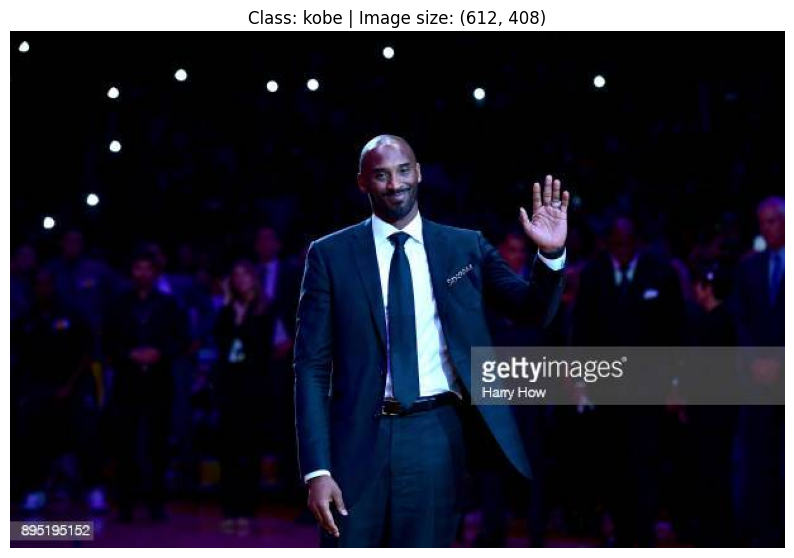

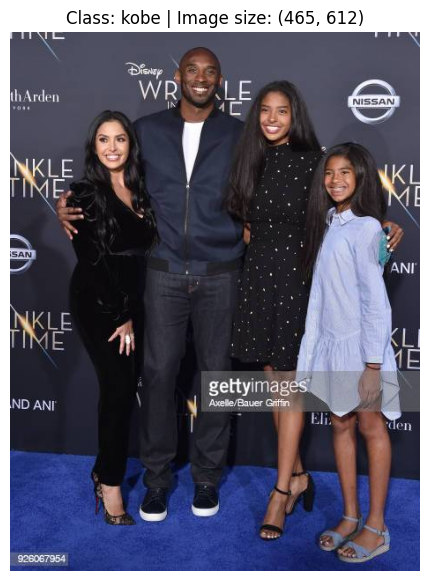

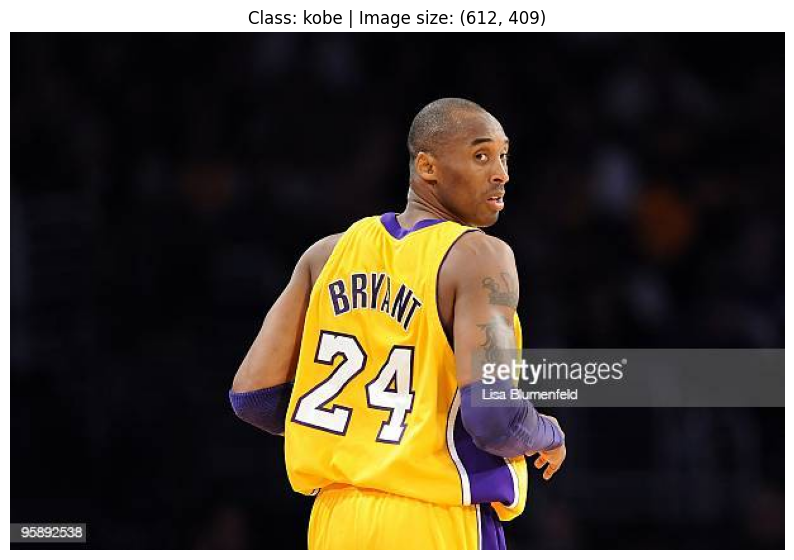

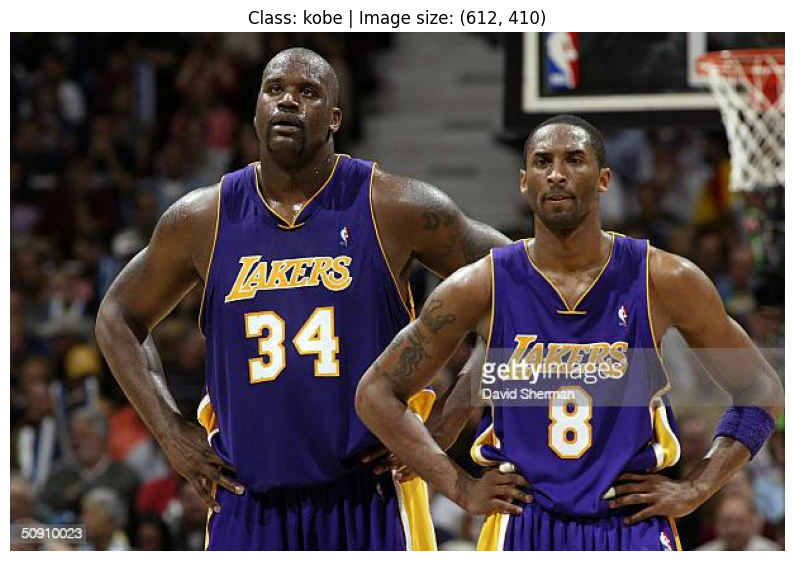

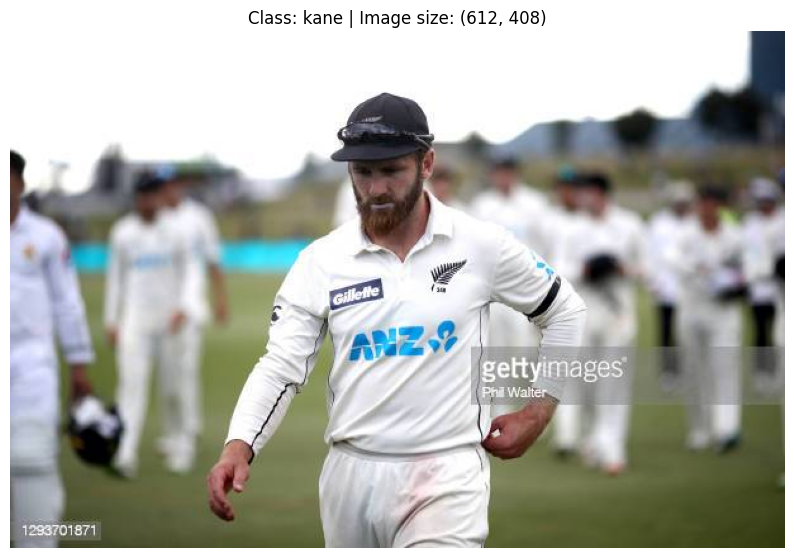

In [11]:
plot_random_images(data_path)

In [12]:
weights = torchvision.models.ResNet50_Weights.DEFAULT

auto_transform = weights.transforms()


weights, auto_transform

(ResNet50_Weights.IMAGENET1K_V2,
 ImageClassification(
     crop_size=[224]
     resize_size=[232]
     mean=[0.485, 0.456, 0.406]
     std=[0.229, 0.224, 0.225]
     interpolation=InterpolationMode.BILINEAR
 ))

In [13]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=auto_transform, batch_size=32)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7fc094e2a290>,
 ['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo'])

In [14]:
train_dataloader_sample_img, train_dataloader_sample_label = next(iter(train_dataloader))

train_dataloader_sample_img.shape, train_dataloader_sample_label.shape

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [15]:
# for milestone 2 - ResNet

model = torchvision.models.resnet50(weights=weights).to(device)
model


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 176MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:


summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "kernel_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"],
        depth=10)

Layer (type (var_name))                  Input Shape          Output Shape         Kernel Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   --                   True
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    [7, 7]               9,408                True
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    --                   128                  True
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      3                    --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   --                   True
│    └─Bottleneck (0)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --    

In [18]:


for param in model.conv1.parameters():
  param.requires_grad = False


for param in model.bn1.parameters():
  param.requires_grad = False

for param in model.layer1.parameters():
  param.requires_grad = False

for param in model.layer2.parameters():
  param.requires_grad = False

for param in model.layer3.parameters():
  param.requires_grad = False

for param in model.layer4.parameters():
  param.requires_grad = False

In [19]:


summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "kernel_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"],
        depth=10)

Layer (type (var_name))                  Input Shape          Output Shape         Kernel Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   --                   Partial
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    [7, 7]               (9,408)              False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    --                   (128)                False
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      3                    --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   --                   False
│    └─Bottleneck (0)                    [1, 64, 56, 56]      [1, 256, 56, 56]     

In [20]:


model.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=len(class_names))
).to(device)


model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=4, bias=True)
)

In [21]:
# loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [23]:
# TRAINING THE MODEL



from ML_Cource_Final_Project.building_blocks import engine

torch.manual_seed(42)
torch.cuda.manual_seed(42)


from timeit import default_timer as timer

start_time = timer()


results = engine.train(model=model, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, epochs=5, device=device)


end_time = timer()

print(f"[INFO] Total training time: {end_time - start_time:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 | train_loss: 1.2546 | train_acc: 0.5816 | test_loss: 1.0817 | test_acc: 0.6875
Epoch: 2 | train_loss: 0.9872 | train_acc: 0.7786 | test_loss: 0.9238 | test_acc: 0.8153
Epoch: 3 | train_loss: 0.7679 | train_acc: 0.8785 | test_loss: 0.7832 | test_acc: 0.8258
Epoch: 4 | train_loss: 0.6675 | train_acc: 0.8837 | test_loss: 0.7186 | test_acc: 0.8466
Epoch: 5 | train_loss: 0.5831 | train_acc: 0.9019 | test_loss: 0.6638 | test_acc: 0.8466
[INFO] Total training time: 15.129


In [24]:
# plot Loss curve function

def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

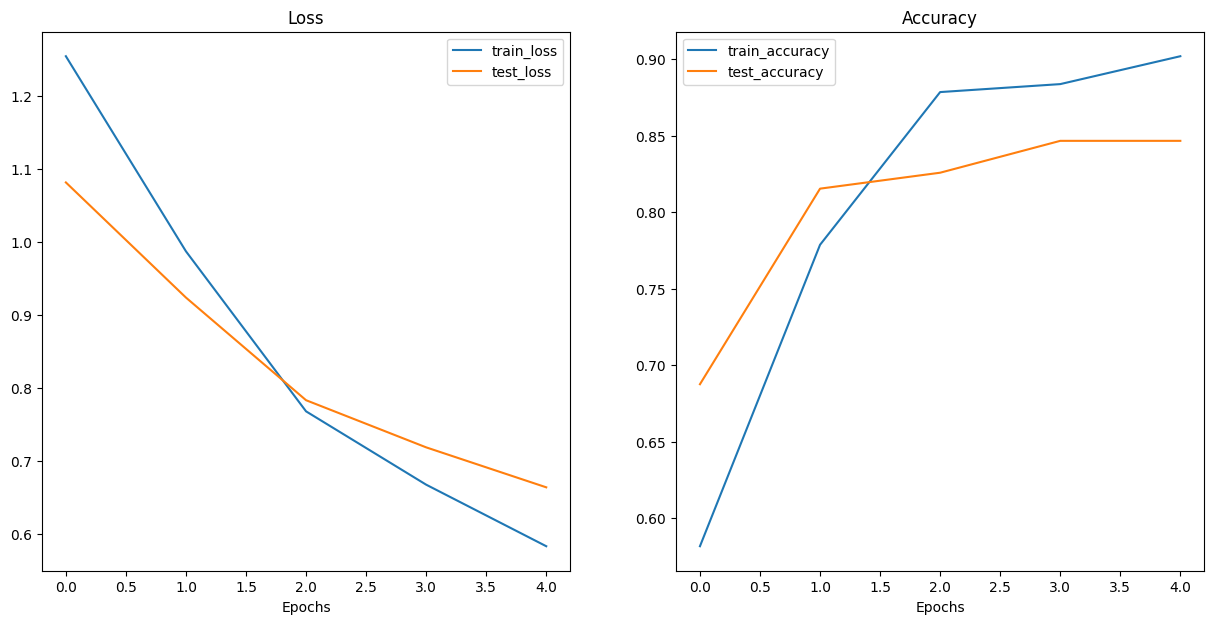

In [25]:
plot_loss_curves(results)

In [30]:
# predict and plot it

from PIL import Image

def pred_and_plot_images(image_paths, model, class_names, transform=None, image_size=(224,224), n=3, device=device):
  random_samples = random.sample(image_paths, k=n)
  model.to(device)

  for random_sample in random_samples:
    img = Image.open(random_sample)
    if transform is not None:
      transform = transform

    else:
      transform = transforms.Compose([
                                          transforms.Resize(image_size),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])
      ])
    img_resized = transform(img)
    img_class = random_sample.parent.stem
    model.eval()
    with torch.inference_mode():
      y_pred = model(img_resized.unsqueeze(0).to(device))
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    if class_names[y_pred_class] == img_class:
      color = 'green'
    else:
      color = 'red'

    plt.title(f"Predicted: {class_names[y_pred_class]} | Confidence: {torch.softmax(y_pred, dim=1).max().item():.2f}", color=color)
    plt.axis(False);

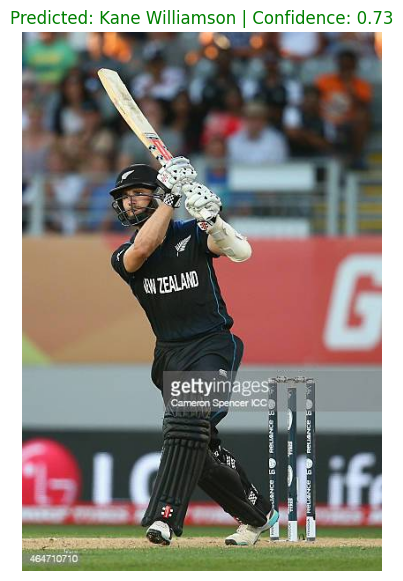

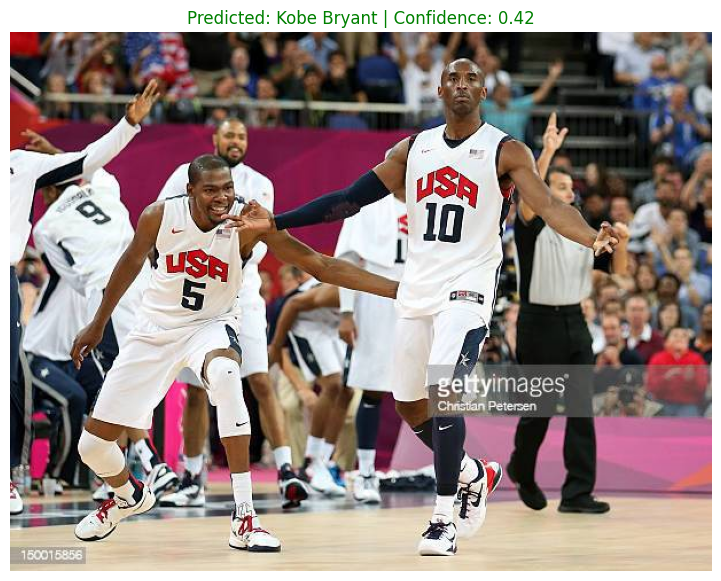

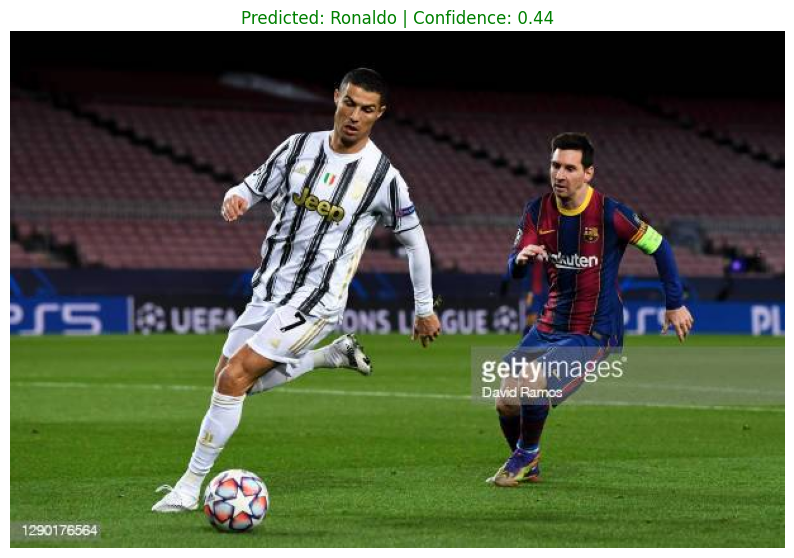

In [32]:
import random


num_images_to_plot = 3

test_image_path_list = list(test_dir.glob('*/*.jpg'))


pred_and_plot_images(test_image_path_list, model, class_names, n=3, device=device)

In [60]:
# for milestone 2 - MobileNet


weights_mobilenet = torchvision.models.MobileNet_V2_Weights.DEFAULT
auto_transform_mobilenet = weights_mobilenet.transforms()
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=auto_transform_mobilenet, batch_size=32)
model_mobilenet = torchvision.models.mobilenet_v2(weights=weights_mobilenet).to(device)



summary(model=model_mobilenet,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "kernel_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"],
        depth=10)



Layer (type (var_name))                       Input Shape          Output Shape         Kernel Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [1, 3, 224, 224]     [1, 1000]            --                   --                   True
├─Sequential (features)                       [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   --                   True
│    └─Conv2dNormActivation (0)               [1, 3, 224, 224]     [1, 32, 112, 112]    --                   --                   True
│    │    └─Conv2d (0)                        [1, 3, 224, 224]     [1, 32, 112, 112]    [3, 3]               864                  True
│    │    └─BatchNorm2d (1)                   [1, 32, 112, 112]    [1, 32, 112, 112]    --                   64                   True
│    │    └─ReLU6 (2)                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --                   --
│    └─InvertedResidual (1)                   [1, 32

In [61]:
for param in model_mobilenet.parameters():
    param.requires_grad = False


model_mobilenet.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=len(class_names))
).to(device)


for param in model_mobilenet.classifier.parameters():
    param.requires_grad = True



summary(model=model_mobilenet,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "kernel_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"],
        depth=10)

Layer (type (var_name))                       Input Shape          Output Shape         Kernel Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [1, 3, 224, 224]     [1, 4]               --                   --                   Partial
├─Sequential (features)                       [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   --                   False
│    └─Conv2dNormActivation (0)               [1, 3, 224, 224]     [1, 32, 112, 112]    --                   --                   False
│    │    └─Conv2d (0)                        [1, 3, 224, 224]     [1, 32, 112, 112]    [3, 3]               (864)                False
│    │    └─BatchNorm2d (1)                   [1, 32, 112, 112]    [1, 32, 112, 112]    --                   (64)                 False
│    │    └─ReLU6 (2)                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --                   --
│    └─InvertedResidual (1)                  

In [62]:
# optimizer and loss function for MobiletNet

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_mobilenet.parameters(), lr=0.001)

In [63]:
# TRAINING THE MODEL


from ML_Cource_Final_Project.building_blocks import engine

torch.manual_seed(42)
torch.cuda.manual_seed(42)


from timeit import default_timer as timer

start_time = timer()


results_mobilenet = engine.train(model=model_mobilenet, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, epochs=5, device=device)


end_time = timer()

print(f"[INFO] Total training time: {end_time - start_time:.3f}")




  0%|          | 0/5 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 | train_loss: 1.2953 | train_acc: 0.4618 | test_loss: 1.1286 | test_acc: 0.6553
Epoch: 2 | train_loss: 1.0756 | train_acc: 0.6927 | test_loss: 0.9794 | test_acc: 0.7633
Epoch: 3 | train_loss: 0.8969 | train_acc: 0.8212 | test_loss: 0.8731 | test_acc: 0.7585
Epoch: 4 | train_loss: 0.7945 | train_acc: 0.8490 | test_loss: 0.7985 | test_acc: 0.8153
Epoch: 5 | train_loss: 0.7301 | train_acc: 0.8394 | test_loss: 0.7678 | test_acc: 0.7386
[INFO] Total training time: 13.567


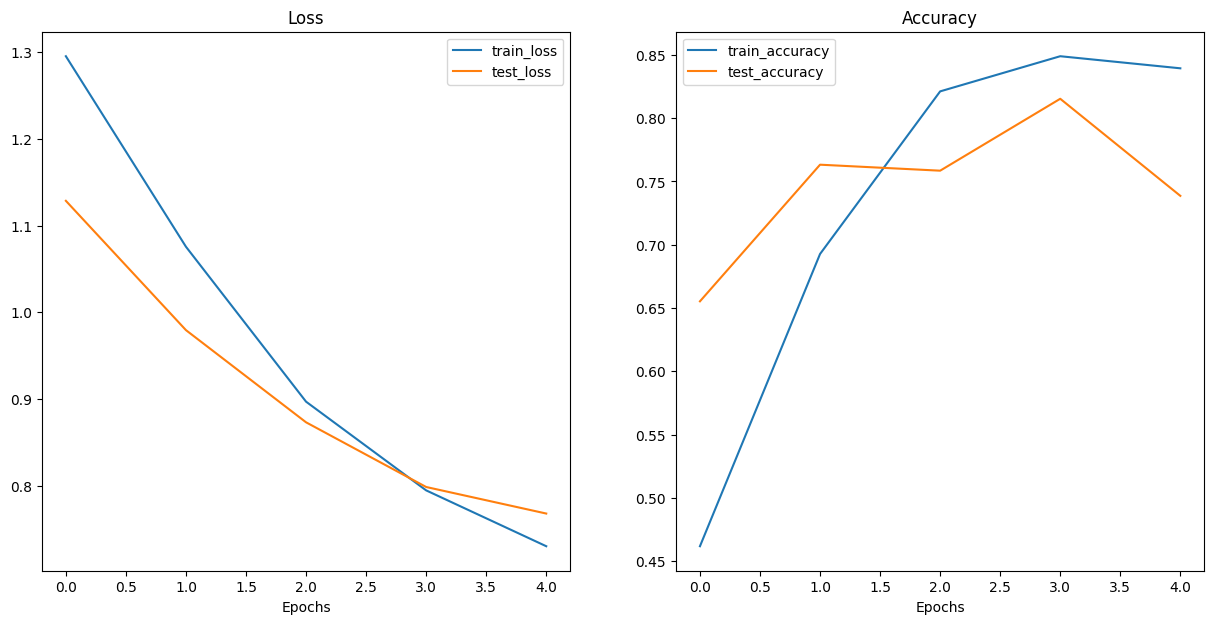

In [64]:
plot_loss_curves(results_mobilenet)

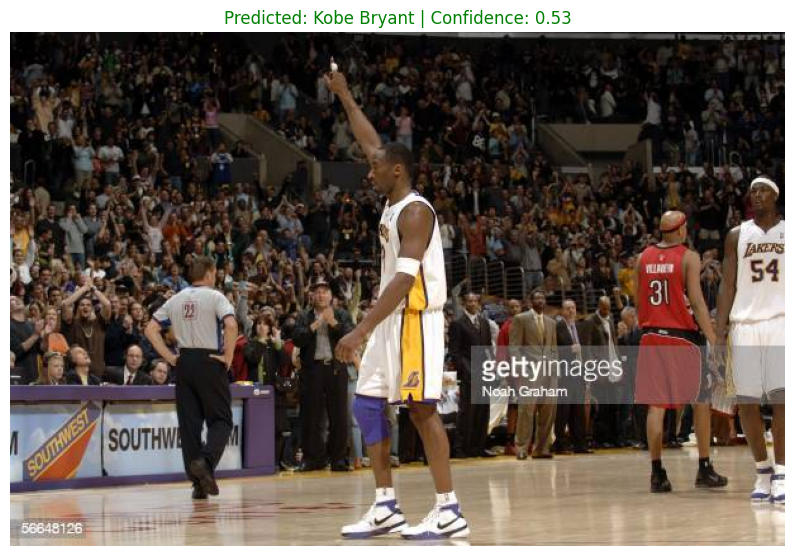

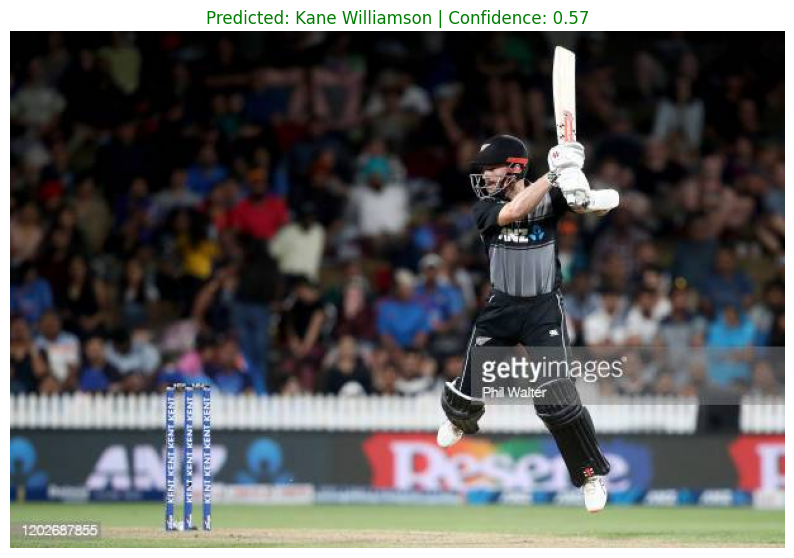

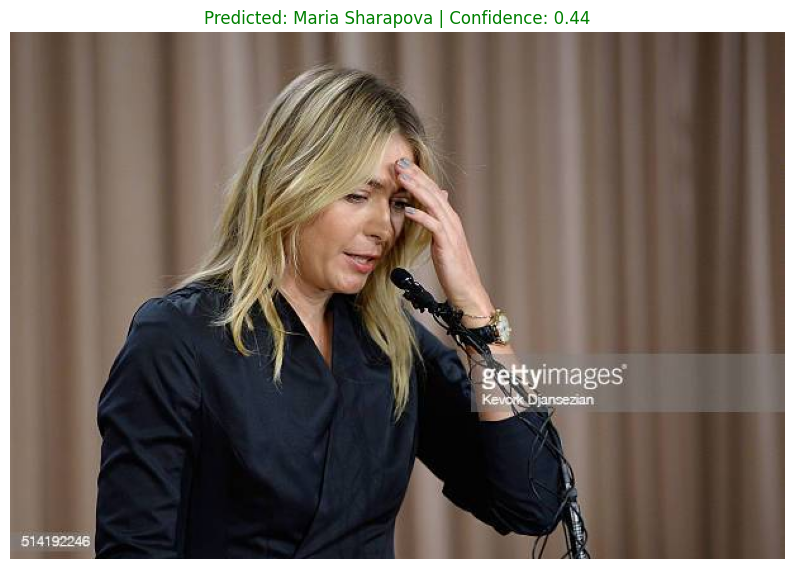

In [67]:
pred_and_plot_images(test_image_path_list, model_mobilenet, class_names, n=3, device=device)